# NumPy Array Indexing

In [1]:
import numpy as np

In [2]:
arr = np.arange(0,100,2)

In [3]:
arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [4]:
arr_resh = arr.reshape(5,10)

In [5]:
arr_resh

array([[ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28, 30, 32, 34, 36, 38],
       [40, 42, 44, 46, 48, 50, 52, 54, 56, 58],
       [60, 62, 64, 66, 68, 70, 72, 74, 76, 78],
       [80, 82, 84, 86, 88, 90, 92, 94, 96, 98]])

In [6]:
arr_resh[2:4,6:]

array([[52, 54, 56, 58],
       [72, 74, 76, 78]])

In [7]:
arr_2d = np.array(([1,2,3],[4,5,6],[7,8,9]))

In [8]:
arr_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

# PANDAS

# Series

In [2]:
import numpy as np
import pandas as pd

In [3]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

In [4]:
arr

array([10, 20, 30])

In [5]:
ser0 = pd.Series(d)

In [18]:
ser0

a    10
b    20
c    30
dtype: int64

In [19]:
ser1 = pd.Series(my_list)

In [20]:
ser1

0    10
1    20
2    30
dtype: int64

In [6]:
ser2 = pd.Series(arr)

In [22]:
ser3 = pd.Series(d)

In [23]:
ser3

a    10
b    20
c    30
dtype: int64

In [ ]:
ser3['a']

In [13]:
str1 = ['Anambra','Lagos','Abuja']

In [14]:
ser4 = pd.Series(str1,labels)

In [15]:
ser4

a    Anambra
b      Lagos
c      Abuja
dtype: object

In [40]:
ser6 = [1,2,3,4]
ser7 = [7,7,8,9]
ser8 = pd.Series(ser6)
ser9 = pd.Series(ser7)

In [41]:
ser8 + ser9

0     8
1     9
2    11
3    13
dtype: int64

# DATAFRAMES: The main work of Pandas

In [56]:
from numpy.random import randn

In [57]:
np.random.seed(101)  #101 is used to obtained exact random numbers as used in the lecture

In [58]:
df = pd.DataFrame(randn(5,4),['A','B','C','D','E'],['W','X','Y','Z'])

In [59]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


# Select column

In [64]:
df['W']  #The result is a SERIES

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [73]:
df[['X','Z']] #Note the double square bracket: list inside a list
              #The result is a dataframe

,X,Z
A,0.628133,0.503826
B,-0.319318,0.605965
C,0.740122,-0.589001
D,-0.758872,0.955057
E,1.978757,0.683509


# Select rows

In [74]:
#Two ways to do this using .loc and .iloc

df.loc['E'] #Locational label-based index
            #Rows are also Pandas series (see the result)
            

W    0.190794
X    1.978757
Y    2.605967
Z    0.683509
Name: E, dtype: float64

In [75]:
#OR

df.iloc[4] #Numerical-based index

W    0.190794
X    1.978757
Y    2.605967
Z    0.683509
Name: E, dtype: float64

In [77]:
booldf = df<0

In [78]:
booldf

,W,X,Y,Z
A,False,False,False,False
B,False,True,True,False
C,True,False,False,True
D,False,True,True,False
E,False,False,False,False


In [82]:
df[booldf]
#OR df[df>0]

,W,X,Y,Z
A,NaN,NaN,NaN,NaN
B,NaN,-0.319318,-0.848077,NaN
C,-2.018168,NaN,NaN,-0.589001
D,NaN,-0.758872,-0.933237,NaN
E,NaN,NaN,NaN,NaN


In [85]:
df[df['Z']<0] #i.e Grab the entire dataframe where 'Z' is less than zero

,W,X,Y,Z
C,-2.018168,0.740122,0.528813,-0.589001


In [86]:
df[df['W']>0] #i.e Grab the entire dataframe where 'W' is greater than zero

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [87]:
df[df['W']>0]['Y'] #From the above, grab 'Y'

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [88]:
#AND
df[df['W']>0][['Y','Z']]  #From that same above(89), grab 'Y' and 'Z'

,Y,Z
A,0.907969,0.503826
B,-0.848077,0.605965
D,-0.933237,0.955057
E,2.605967,0.683509


In [89]:
#Multiple conditions

df[(df['W']>0) & (df['Y'] > 1)] #Ampersand instead of AND
                                

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


In [91]:
df[(df['W']>0) | (df['Y'] > 1)] #Pipe operator instead of OR

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


# MISSING DATA

In [99]:
import numpy as np
import pandas as pd

In [100]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [101]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [102]:
#DROP
df.dropna() #removes NAN along x-axis(defalut: axis=0)

,A,B,C
0,1.0,5.0,1


In [103]:
df.dropna(axis=1) #removes NAN along y-axis

,C
0,1
1,2
2,3


In [105]:
df.dropna(axis=0,thresh=2) #drops NAN in the row where NAN appears from 2 times up

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [109]:
#FILL
df.fillna(value='FILLED')

,A,B,C
0,1.0,5.0,1
1,2.0,FILLED,2
2,FILLED,FILLED,3


# GROUP BY

In [2]:
import numpy as np
import pandas as pd


# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [3]:
df = pd.DataFrame(data)

In [8]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [12]:
mycomp = df.groupby('Company')

In [13]:
mycomp

In [15]:
mycomp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [16]:
mycomp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [19]:
mycomp.std().loc['FB']

Sales    75.660426
Name: FB, dtype: float64

In [22]:
#OR Use one liner syntax

df.groupby('Company').std().loc['FB']

Sales    75.660426
Name: FB, dtype: float64

# Groupby with two or more parameters

In [ ]:
#SYNTAX: df.groupby(by=['Day of Week','Hour']).count()
#This will normally result to multi-level index (i.e A dataframe with more than one index)

# Count

In [23]:
df.groupby('Company').count()

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [17]:
mycomp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


# DECSRIBE

In [26]:
df.groupby('Company').describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [27]:
df.groupby('Company').describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

# CONCATINATION,MERGING AND JOINING

In [36]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [37]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                        # index=[4, 5, 6, 7]) 
                         index=[0, 1, 2, 3])

In [38]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        #index=[8, 9, 10, 11])
                        index=[0, 1, 2, 3])

In [39]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [40]:
df2

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [41]:
df3

,A,B,C,D
0,A8,B8,C8,D8
1,A9,B9,C9,D9
2,A10,B10,C10,D10
3,A11,B11,C11,D11


# Concatination

In [42]:
pd.concat([df1,df2,df3], axis=0) #axis=0 means concatinating in x-axis

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
0,A8,B8,C8,D8
1,A9,B9,C9,D9


In [43]:
pd.concat([df1,df2,df3], axis=1) #axis=1 means concatinating in y-axis

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


In [44]:
#I am ok with CONCATINATE in terms of it's application. Yet to understand MERGING and JOINING

# OPERATIONS

In [3]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],
                   'col2':[444,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


# Unique Values

In [8]:
df['col2'].unique() #Note that there is a repeated value in col2

array([444, 555, 666], dtype=int64)

In [9]:
df['col2'].nunique() 

3

In [10]:
#OR
len(df['col2'].unique())

3

In [11]:
df['col2'].value_counts() #Returns how many times each unique value is repeated in the coulumn

444    2
666    1
555    1
Name: col2, dtype: int64

# Selecting Data

In [5]:
#Conditional selection
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [6]:
newdf

,col1,col2,col3
3,4,444,xyz


In [14]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


# Sum(+others) the column

In [15]:
df['col2'].sum()

2109

In [16]:
df['col2'].std()

106.27440896095354

In [17]:
df['col2'].mean()

527.25

# Applying Function: Most Powerful of Pandas

In [32]:
def timesX(z):
    return z*2

In [33]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [34]:
df['col2'].apply(timesX) #multiples the specified column by 2

0     888
1    1110
2    1332
3     888
Name: col2, dtype: int64

In [35]:
#OR just using Lambda expression in one line instead of the function above
df['col2'].apply(lambda z:z*2)

0     888
1    1110
2    1332
3     888
Name: col2, dtype: int64

In [36]:
#Return the length of each string in the specied column
df['col3'].apply(len) 

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

# Delete Column/Row

In [37]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [41]:
#drops col1
df.drop('col1', axis=1, inplace=False) #already know what 'inplace' does. It is actually 'False' by default

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [39]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [28]:
#drops row 3
df.drop(3, axis=0, inplace=False) 

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi


In [43]:
df.columns #return the y-axis headings

Index(['col1', 'col2', 'col3'], dtype='object')

In [44]:
df.index #return the x-axis headings

RangeIndex(start=0, stop=4, step=1)

# Sort

In [46]:
df.sort_values(by='col2') 
#OR
#df.sort_values('col2')

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


# Data Input and Output

In [7]:
pwd

'C:\\Users\\AKAMS\\My Courses'

In [48]:
cd d:

D:\


In [50]:
cd python

D:\python


In [52]:
import os

In [112]:
os.listdir()

In [128]:
pd.read_csv('D:/Python/Oneexample.csv')#.head()  #check '.head() method'

,id,first_name,last_name,email,gender,ip_address,city
0,1,Joseph,Zaniolini,jzaniolini0@simplemachines.org,Male,163.168.68.132,Pedro Leopoldo
1,2,Freida,Drillingcourt,fdrillingcourt1@umich.edu,Female,97.212.102.79,Buri
2,3,Nanni,Herity,nherity2@statcounter.com,Female,145.151.178.98,Claver
3,4,Orazio,Frayling,ofrayling3@economist.com,Male,25.199.143.143,Kungur
4,5,Julianne,Murrison,jmurrison4@cbslocal.com,Female,10.186.243.144,Sainte-Luce-sur-Loire
...,...,...,...,...,...,...,...
997,998,Willyt,Vannuccini,wvannuccinirp@tuttocitta.it,Female,156.149.18.155,Xiaopingba
998,999,Gaelan,Petrashkov,gpetrashkovrq@hostgator.com,Male,219.109.169.75,Bethlehem
999,1000,Stirling,Francesc,sfrancescrr@cyberchimps.com,Male,108.193.9.206,Potok Złoty
1000,new,new,new,NaN,NaN,NaN,NaN


# CSV

In [111]:
pd.read_csv('cars.csv')

In [91]:
cd C:\Users\AKAMS\Downloads\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\03-Python-for-Data-Analysis-Pandas

C:\Users\AKAMS\Downloads\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\03-Python-for-Data-Analysis-Pandas


In [107]:
df = pd.read_csv("example")

In [108]:
df.to_csv('D:\Python\cars.csv',index=False) 

In [109]:
pd.read_csv("D:\Python\cars.csv") #the content of 'example' overites cars.csv

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


# EXCEL 

In [124]:
pd.read_excel('Excel_Sample.xlsx', sheet_name='Sheet1')

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


# Will explore the html and sql parts later for above lesson

# MATPLOTLIB

# Object-Oriented Method (There is 'functional mthd' also)

In [2]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

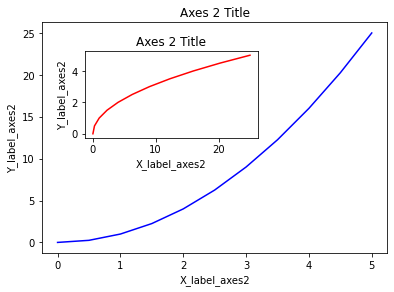

In [3]:
import matplotlib.pyplot as plt


# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b') #'b'=blue 
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title')

plt.show()

# Subplot

Text(0.5, 1.0, 'SECOND')

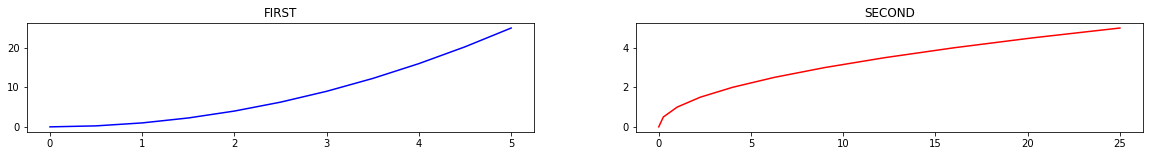

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,2)) #'axes' can be any string. Remember tuple and packing

axes[0].plot(x, y, 'b')
axes[0].set_title('FIRST')

axes[1].plot(y, x, 'r')
axes[1].set_title('SECOND')

#You can add more attributes to 'axes'
#You can also do the sub plot with iteration as used in the UDEMY manual

# Two graphs in one space

(0.0, 5.0)

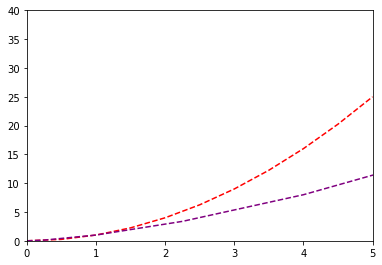

In [13]:
import numpy as np
x = np.linspace(0, 5, 11)


fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x,x**2, color='red', ls='--')
ax.plot(y,x**3, color='purple', ls='--')


(0.0, 5.0)

In [38]:
fig.savefig("PRACTICEIMG.png")

In [27]:
from PIL import Image

In [28]:
myIMG = Image.open("PRACTICEIMG.png")

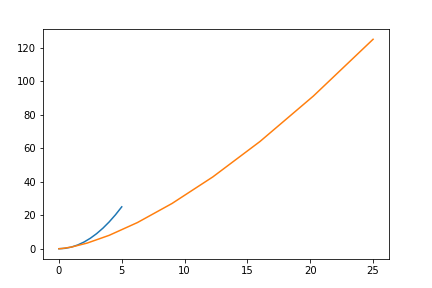

In [29]:
myIMG

# Zoom in on X and Y axis (plot range)

(0.0, 5.0)

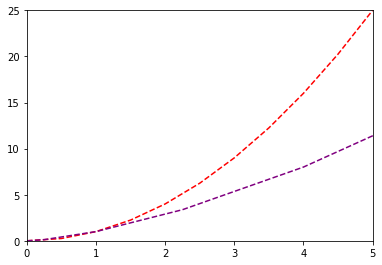

In [20]:
#All the codes must be in one cell for it to display the graphical result
import numpy as np
x = np.linspace(0, 5, 11)


fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x,x**2, color='red', ls='--')
ax.plot(y,x**3, color='purple', ls='--')

ax.set_ylim([0,25])
ax.set_xlim([0,5])

# Tight

(-1.25, 26.25, -6.25, 131.25)

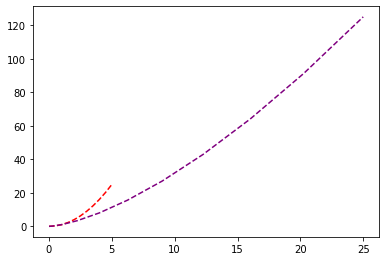

In [21]:
#All the codes must be in one cell for it to display the graphical result
import numpy as np
x = np.linspace(0, 5, 11)


fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x,x**2, color='red', ls='--')
ax.plot(y,x**3, color='purple', ls='--')

ax.axis("tight")

# SEABORN 

To work with csv/excel etc files in seaborn, import/read with Pandas

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.show() #OR %matplotlib inline(displays visuals in cells but works only in Jupiter)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
tips = sns.load_dataset("tips")

In [64]:
tips.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


C:\Users\AKAMS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

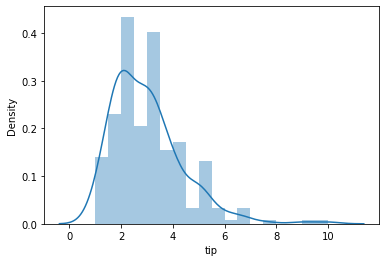

In [46]:
sns.distplot(tips['tip'])

# Categorical Data Plots

# Bar Plot

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

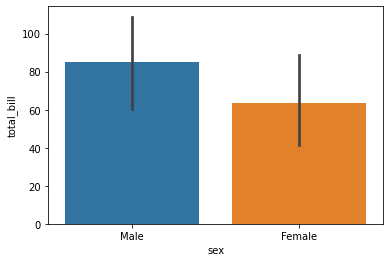

In [62]:
sns.barplot(x='sex',y='total_bill',data=tip, estimator=np.var)

# Pair Plot & Style,Color

In [46]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
iris['species'].unique()

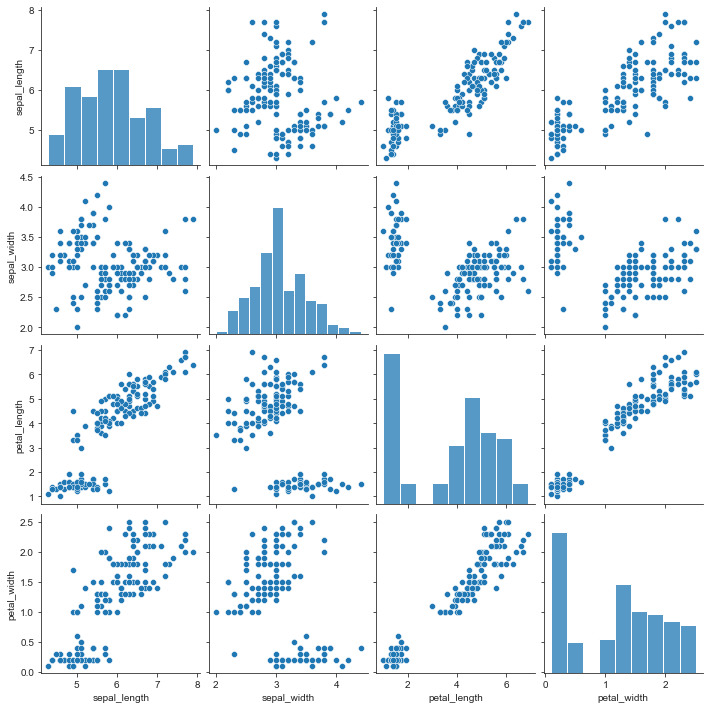

In [47]:
sns.set_style('ticks')
sns.pairplot(iris)
sns.despine() #it has some args like left,right,top,bottom (see documentation by clicking TAB+SHIFT)
#Can take some time to display visuals

# VISUALIZATION WITH PANDAS

In [9]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns #Of course pandas can work without seaborn but seaborn makes its visuals look 
                      #more beautiful

In [10]:
cd C:\Users\AKAMS\Downloads\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\07-Pandas-Built-in-Data-Viz

C:\Users\AKAMS\Downloads\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\07-Pandas-Built-in-Data-Viz


In [11]:
k = pd.read_csv('df1', index_col=0)
k.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


<AxesSubplot:>

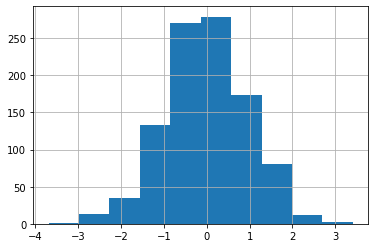

In [12]:
k['A'].hist()

<AxesSubplot:ylabel='Frequency'>

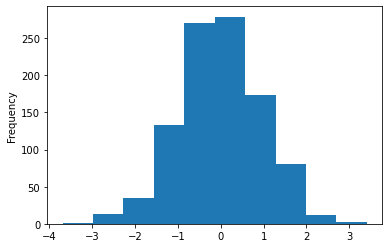

In [20]:
k['A'].plot(kind='hist')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tip = sns.load_dataset('tips')
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

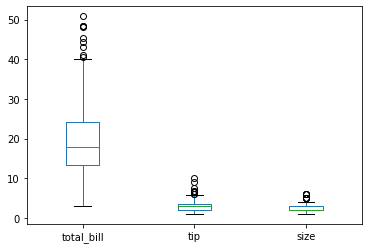

In [17]:
tip.plot.box()

# LEGEND OUTSIDE THE PLOT: 02-Pandas Data Visualization Exercise

In [14]:
cd C:\Users\AKAMS\Downloads\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\07-Pandas-Built-in-Data-Viz


C:\Users\AKAMS\Downloads\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\07-Pandas-Built-in-Data-Viz


<AxesSubplot:>

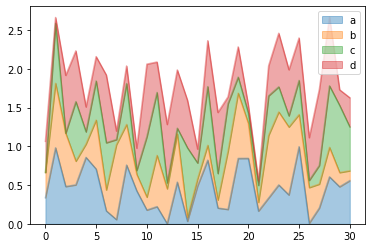

In [15]:
df3 = pd.read_csv('df3')
df3.loc[0:30].plot.area(alpha=0.4) #OR df3.head(30).plot.area(alpha=0.4) to grab the first 30 rows


#legend outside the plot
#02-Pandas Data Visualization Exercise

df3 = pd.read_csv('df3')
df3.loc[0:30].plot.area(alpha=0.4)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# PLOTLY AND CUFFLINKS

The link: https://plotly.com/python/reference contains all the documentation syntax for the lovely
Plotly. Very useful

In [6]:
import pandas as pd
import numpy as np

In [7]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
print(__version__)

5.0.0


In [8]:
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [9]:
df3.loc[0:30].iplot()

NameError: name 'df3' is not defined

# Sum Each Column and Plot

In [ ]:
df3.head()

In [21]:
df3.sum().iplot(kind='bar')

# 3D Surface

In [22]:
df4 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
df4.iplot(kind="surface")

# GEOGRAPHICAL PLOTTING

In [14]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [15]:
init_notebook_mode(connected=True) 

In [16]:
import pandas as pd

data = dict(type = 'choropleth',
            locations = ['AZ','CA','NY'],
            locationmode = 'USA-states',
            colorscale= 'Portland',
            text= ['text1','text2','text3'],
            z=[1.0,2.0,3.0],
            colorbar = {'title':'Colorbar Title'})

layout = dict(geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

# Real Data US Map Choropleth

In [11]:
cd C:\Users\AKAMS\Downloads\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\09-Geographical-Plotting

C:\Users\AKAMS\Downloads\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\09-Geographical-Plotting


In [12]:
df = pd.read_csv('2011_US_AGRI_Exports')
df.head(5)

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


In [17]:
data = dict(type='choropleth',
            colorscale = 'ylorbr',
            locations = df['code'],
            z = df['total exports'],
            locationmode = 'USA-states',
            text = df['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions USD"}
            ) 

layout = dict(title = '2011 US Agriculture Exports by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

choromap = go.Figure(data = [data],layout = layout)

iplot(choromap)

# World Choropleth Map

In [37]:
df = pd.read_csv('2014_World_GDP')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [39]:
data = dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorbar = {'title' : 'GDP Billions US'},
      ) 

layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

# CONVERT INDEX TO COLUMN 

In [ ]:
#See 911 Call Data Capstone Project (my own solution)

In [3]:
cd C:\Users\AKAMS\Downloads\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression

C:\Users\AKAMS\Downloads\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression


In [33]:
tit = pd.read_csv('titanic_test.csv')



In [34]:
tit.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# LOGISTIC REGRESSION WITH PYTHON---STILL UNCERTAIN 
# UNTIL I ASK ANIETE

THE TITANIC DATA

The data was already trained in the tutorial using the 'titanic_trained.csv'
Here i am trying to use both the trained and test datasets differently (instead of using train-test
split method that was used in the tuorial) 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
test = pd.read_csv('titanic_test.csv')

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

# Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

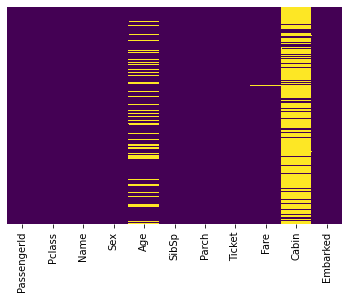

In [7]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
train = pd.read_csv('titanic_train.csv')

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

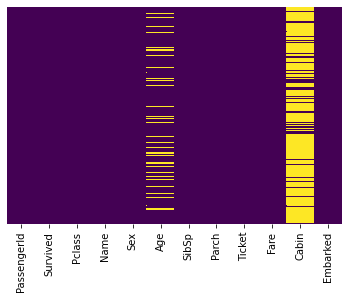

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Data Cleaning

# TRAIN

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

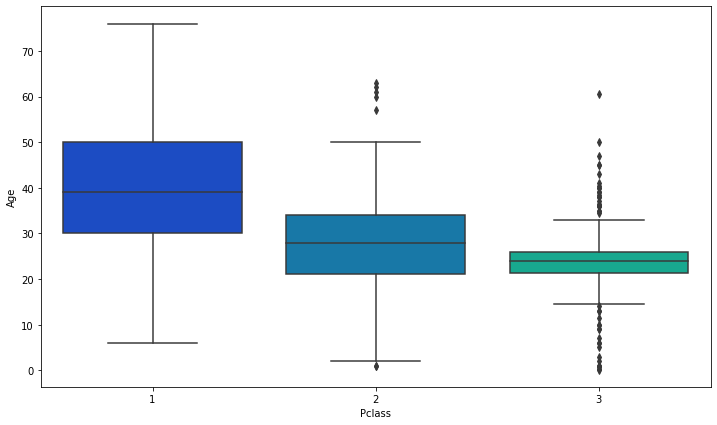

In [117]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [12]:
def impute_age(cols):
    Age = cols[0] #Index to grab the first value from 'train[['Age','Pclass']]', 
                  #possible bc of 'apply' function (line 88) on it. (mine from voice)
    Pclass = cols[1] #Similarly
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<AxesSubplot:>

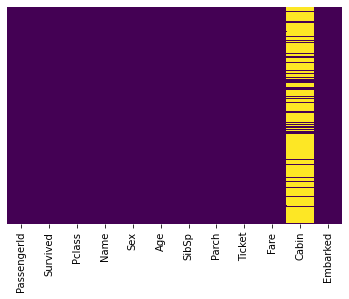

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [15]:
train.drop('Cabin',axis=1,inplace=True)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
#Delete any row with missing value
train.dropna(inplace=True)

# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [19]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [20]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [21]:
train = pd.concat([train,sex,embark],axis=1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# TEST

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

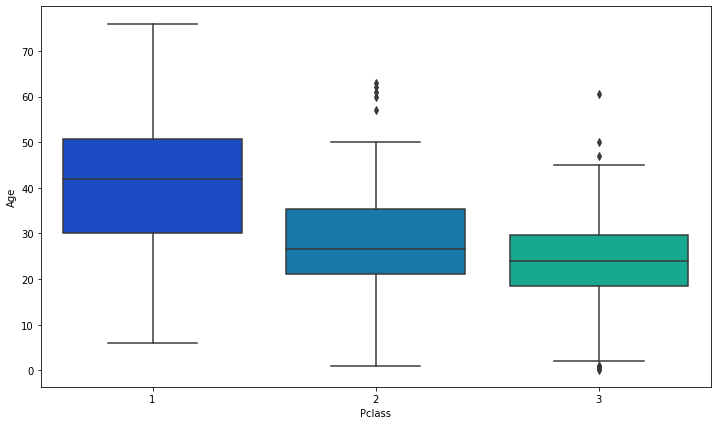

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

In [24]:
def impute_age(cols):
    Age = cols[0] #Index to grab the first value from 'train[['Age','Pclass']]', 
                  #possible bc of 'apply' function (line 88) on it. (mine from voice)
    Pclass = cols[1] #Similarly
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [25]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<AxesSubplot:>

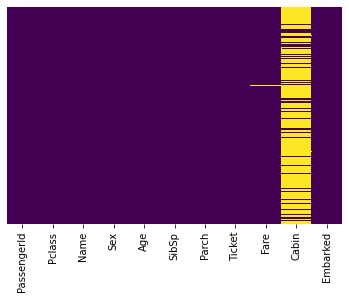

In [26]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [27]:
#Delete the 'Cabin' col 
test.drop('Cabin',axis=1,inplace=True)

In [28]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [29]:
#Delete any row with missing value
test.dropna(inplace=True)

<AxesSubplot:>

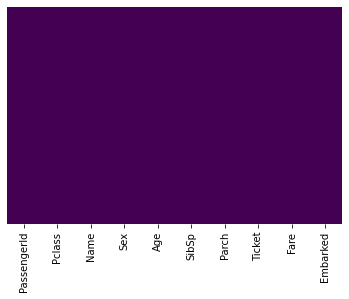

In [30]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Converting Categorical Features¶
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [31]:
sex = pd.get_dummies(test['Sex'],drop_first=True) #Uses male and drops the female col bc one is the 
                                                #perfect predictor of the other in each row
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [32]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [33]:
test = pd.concat([test,sex,embark],axis=1)

In [34]:
test.head()
#Everything is now numerical

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

In [37]:
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)
y_train = train('Survived')
y_test = test('Survived')

KeyError: "['Survived'] not found in axis"

# Training and Predicting

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [1]:
cd C:\Users\AKAMS\Downloads\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\14-K-Nearest-Neighbors

C:\Users\AKAMS\Downloads\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\14-K-Nearest-Neighbors


In [2]:
import pandas as pd
import numpy as np

In [7]:
import os
os.listdir()

['01-K Nearest Neighbors with Python.ipynb',
 '02-K Nearest Neighbors Project.ipynb',
 '03-K Nearest Neighbors Project - Solutions.ipynb',
 'Classified Data',
 'KNN_Project_Data']

In [9]:
pd.read_csv('Classified Data', index_col=0)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
